## 递归

### 数列求和，全括号表达式

In [4]:
def evaluate_expression(expression):
    # 定义一个递归辅助函数，用于计算从指定起始位置开始的子表达式
    def helper(s, start):
        stack = []  # 用于保存操作数和中间计算结果
        num = 0  # 当前操作数
        sign = '+'  # 当前操作符，初始设为加号
        i = start  # 从传入的起始位置开始解析

        while i < len(s):
            char = s[i]

            # 如果当前字符是数字，则构造完整的数字（支持多位数）
            if char.isdigit():
                num = num * 10 + int(char)

            # 如果遇到 '('，开始递归处理括号内的表达式
            if char == '(':
                # 递归计算括号内的表达式结果，并更新位置
                num, i = helper(s, i + 1)

            # 如果当前字符是运算符或到达表达式末尾时，则执行栈运算
            if char in '+-*/)' or i == len(s) - 1:
                # 根据当前的操作符将数字推入栈中或进行运算
                if sign == '+':
                    stack.append(num)
                elif sign == '-':
                    stack.append(-num)
                elif sign == '*':
                    stack[-1] *= num  # 栈顶的元素乘以当前数字
                elif sign == '/':
                    stack[-1] = int(stack[-1] / num)  # 栈顶的元素除以当前数字，注意处理负数向零取整
                num = 0  # 重置当前数字
                sign = char  # 更新当前操作符

            # 如果遇到 ')'，结束当前的括号并返回结果
            if char == ')':
                break

            i += 1

        # 返回当前栈的计算结果和当前位置
        return sum(stack), i

    # 调用辅助函数，从表达式的第0个位置开始计算
    result, _ = helper(expression, 0)
    return result

# 示例测试
expression = "(1+(4+5+2)-3)+(6+8)"
print(evaluate_expression(expression))  # 预期输出: 23


23


### 任意进制转换

In [5]:
def convert_to_base(n, base):
    """
    将十进制整数 n 转换为指定的 base 进制。
    
    :param n: 待转换的整数 (十进制)
    :param base: 目标进制
    :return: 转换后的字符串表示
    """
    # 定义数字字符映射（0-9，A-Z 用于进制超过10的情况）
    digits = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    # 递归终止条件：n < base，直接返回该数字的字符
    if n < base:
        return digits[n]
    else:
        # 递归调用，将当前位和余数组合起来
        return convert_to_base(n // base, base) + digits[n % base]

# 测试用例
print(convert_to_base(255, 2))   # 输出: 11111111（二进制）
print(convert_to_base(255, 8))   # 输出: 377（八进制）
print(convert_to_base(255, 16))  # 输出: FF（十六进制）
print(convert_to_base(255, 3))   # 输出: 100110（3进制）
print(convert_to_base(255, 36))  # 输出: 73（36进制）


11111111
377
FF
100110
73


### 递归深度的限制

In [6]:
import sys
sys.getrecursionlimit()

3000

### 递归可视化：分形树

In [7]:
import turtle

def draw_branch(length, angle, min_length):
    """
    递归绘制分形树的分支。

    :param length: 当前分支的长度
    :param angle: 分支与主干的夹角
    :param min_length: 最小分支长度，当达到该长度时递归停止
    """
    # 当分支长度小于最小值时停止递归
    if length < min_length:
        return

    # 绘制当前分支
    turtle.forward(length)
    
    # 绘制左子树
    turtle.left(angle)
    draw_branch(length * 0.7, angle, min_length)
    
    # 绘制右子树
    turtle.right(2 * angle)
    draw_branch(length * 0.7, angle, min_length)
    
    # 恢复到原来的方向
    turtle.left(angle)
    
    # 返回到分支的起点
    turtle.backward(length)

def setup_tree():
    """
    设置 Turtle 画布并绘制分形树。
    """
    # 初始化 Turtle
    turtle.speed('fastest')  # 设置绘制速度
    turtle.left(90)  # 使乌龟朝上
    turtle.penup()
    turtle.backward(200)  # 为了更好地显示树，向下移动起点
    turtle.pendown()
    
    # 绘制树干
    draw_branch(100, 30, 10)  # 调整分支长度、角度和最小长度

    # 完成绘制后关闭窗口
    turtle.done()

# 运行分形树的绘制
setup_tree()


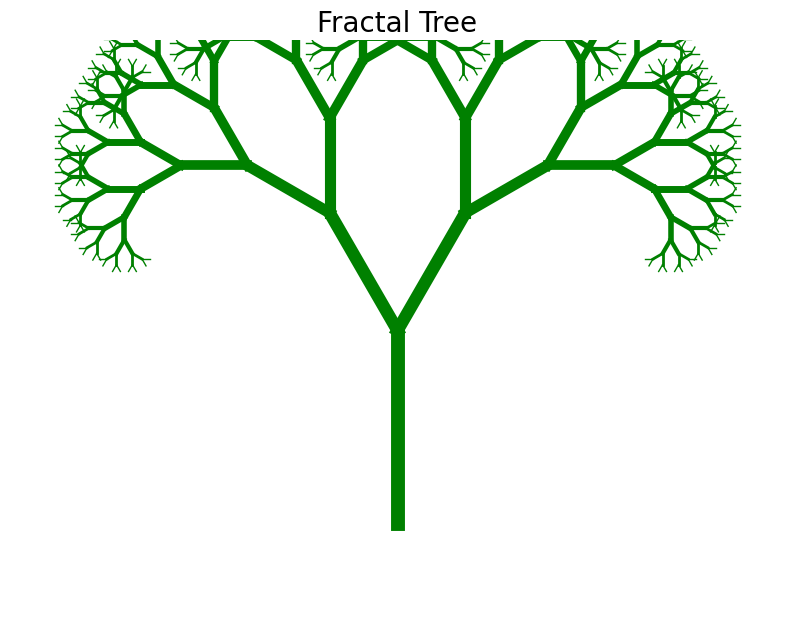

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fractal_tree(x, y, angle, length, depth, ax):
    """
    Recursively draw a fractal tree.

    :param x: The x-coordinate of the starting point.
    :param y: The y-coordinate of the starting point.
    :param angle: The current angle of the branch.
    :param length: The length of the current branch.
    :param depth: The current depth of recursion.
    :param ax: Matplotlib Axes object to draw on.
    """
    if depth == 0:
        return
    
    # Calculate the end of the branch
    x_end = x + length * np.cos(np.radians(angle))
    y_end = y + length * np.sin(np.radians(angle))
    
    # Draw the line segment
    ax.plot([x, x_end], [y, y_end], color='green', linewidth=depth)

    # Recursively draw the left and right branches
    draw_fractal_tree(x_end, y_end, angle - 30, length * 0.7, depth - 1, ax)  # Left branch
    draw_fractal_tree(x_end, y_end, angle + 30, length * 0.7, depth - 1, ax)  # Right branch

def plot_fractal_tree():
    """
    Plot a fractal tree using matplotlib.
    """
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis
    
    # Draw the fractal tree starting from the bottom center of the figure
    draw_fractal_tree(0, 0, 90, 10, 10, ax)
    
    # Set limits and display the plot
    ax.set_xlim(-20, 20)
    ax.set_ylim(-5, 25)
    plt.title('Fractal Tree', fontsize=20)
    plt.show()

# Plot the fractal tree
plot_fractal_tree()


### 递归可视化：科赫雪花

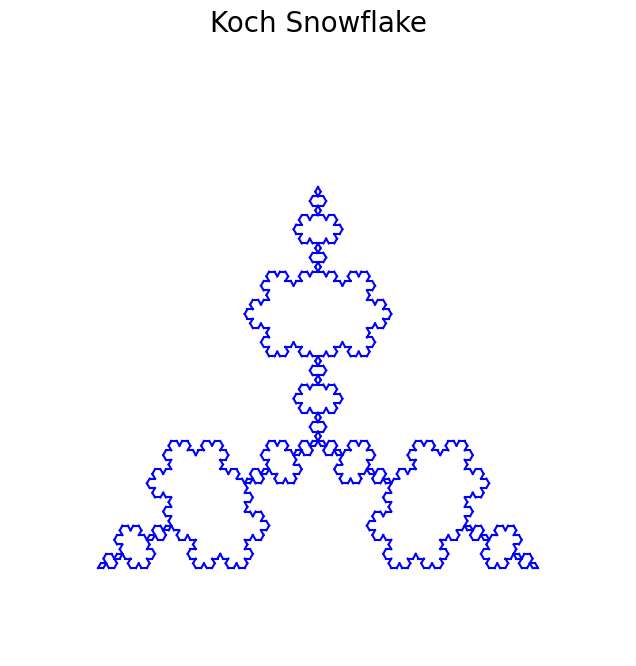

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(ax, p1, p2, depth):
    """
    Draw a Koch snowflake curve between two points using recursion.

    :param ax: Matplotlib Axes object to draw on.
    :param p1: Starting point of the line segment (x, y).
    :param p2: Ending point of the line segment (x, y).
    :param depth: The depth of recursion.
    """
    if depth == 0:
        # Draw a line segment when recursion depth is 0
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='blue')
    else:
        # Calculate points for the subdivision
        # Divide the line into three segments
        p3 = (2 * p1[0] + p2[0]) / 3, (2 * p1[1] + p2[1]) / 3
        p4 = (p1[0] + 2 * p2[0]) / 3, (p1[1] + 2 * p2[1]) / 3

        # Calculate the peak point for the equilateral triangle
        dx = p4[0] - p3[0]
        dy = p4[1] - p3[1]
        p5 = (
            p3[0] + 0.5 * dx - np.sqrt(3) * 0.5 * dy,
            p3[1] + 0.5 * dy + np.sqrt(3) * 0.5 * dx,
        )

        # Recursively draw the four sides of the new shape
        koch_snowflake(ax, p1, p3, depth - 1)
        koch_snowflake(ax, p3, p5, depth - 1)
        koch_snowflake(ax, p5, p4, depth - 1)
        koch_snowflake(ax, p4, p2, depth - 1)

def plot_koch_snowflake(depth):
    """
    Plot the complete Koch snowflake using matplotlib.

    :param depth: The depth of recursion for the Koch snowflake.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    # Define the initial equilateral triangle points
    p1 = (0, 0)
    p2 = (1, 0)
    p3 = (0.5, np.sqrt(3) / 2)

    # Draw each side of the Koch snowflake
    koch_snowflake(ax, p1, p2, depth)
    koch_snowflake(ax, p2, p3, depth)
    koch_snowflake(ax, p3, p1, depth)

    # Set the limits and show the plot
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    plt.title('Koch Snowflake', fontsize=20)
    plt.show()

# Plot the Koch snowflake with a specified recursion depth
plot_koch_snowflake(4)


### 递归可视化：谢尔宾斯基三角形

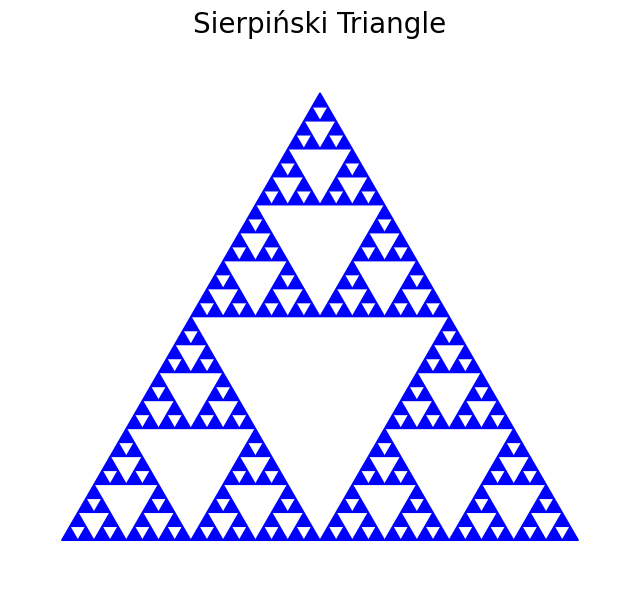

In [12]:
import matplotlib.pyplot as plt

def sierpinski_triangle(ax, p1, p2, p3, depth):
    """
    Draw a Sierpiński triangle using recursion.

    :param ax: Matplotlib Axes object to draw on.
    :param p1: First vertex of the triangle (x, y).
    :param p2: Second vertex of the triangle (x, y).
    :param p3: Third vertex of the triangle (x, y).
    :param depth: The depth of recursion.
    """
    if depth == 0:
        # Draw a filled triangle
        triangle = [p1, p2, p3]
        ax.fill(*zip(*triangle), color='blue')
    else:
        # Calculate midpoints of each side of the triangle
        mid12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
        mid23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
        mid31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

        # Recursively draw three smaller triangles
        sierpinski_triangle(ax, p1, mid12, mid31, depth - 1)
        sierpinski_triangle(ax, mid12, p2, mid23, depth - 1)
        sierpinski_triangle(ax, mid31, mid23, p3, depth - 1)

def plot_sierpinski_triangle(depth):
    """
    Plot the complete Sierpiński triangle using matplotlib.

    :param depth: The depth of recursion for the Sierpiński triangle.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    # Define the initial vertices of the large triangle
    p1 = (0, 0)
    p2 = (1, 0)
    p3 = (0.5, (3**0.5) / 2)

    # Draw the Sierpiński triangle
    sierpinski_triangle(ax, p1, p2, p3, depth)

    # Set the limits and show the plot
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, (3**0.5) / 2 + 0.1)
    plt.title('Sierpiński Triangle', fontsize=20)
    plt.show()

# Plot the Sierpiński triangle with a specified recursion depth
plot_sierpinski_triangle(5)


In [14]:
import turtle

def draw_triangle(vertices, color):
    """Draw a filled triangle given its vertices."""
    turtle.fillcolor(color)
    turtle.begin_fill()
    for vertex in vertices:
        turtle.goto(vertex)
    turtle.end_fill()

def sierpinski_triangle(vertices, depth):
    """Recursively draw the Sierpiński triangle."""
    if depth == 0:
        draw_triangle(vertices, 'blue')
    else:
        # Calculate midpoints of each side of the triangle
        mid1 = ((vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2)
        mid2 = ((vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2)
        mid3 = ((vertices[2][0] + vertices[0][0]) / 2, (vertices[2][1] + vertices[0][1]) / 2)

        # Recursively draw three smaller triangles
        sierpinski_triangle([vertices[0], mid1, mid3], depth - 1)
        sierpinski_triangle([vertices[1], mid1, mid2], depth - 1)
        sierpinski_triangle([vertices[2], mid2, mid3], depth - 1)

def setup_turtle():
    """Set up the turtle environment."""
    turtle.speed(0)  # Fastest drawing speed
    turtle.penup()
    turtle.goto(-200, -150)  # Move turtle to starting position
    turtle.pendown()
    turtle.hideturtle()
    turtle.title("Sierpiński Triangle")

def main(depth):
    """Main function to draw the Sierpiński triangle."""
    setup_turtle()
    
    # Define the vertices of the initial large triangle
    vertices = [(-200, -150), (200, -150), (0, 200)]
    
    # Draw the Sierpiński triangle
    sierpinski_triangle(vertices, depth)
    
    # Finish up
    turtle.done()

# Set the recursion depth (you can change this value)
main(5)


In [16]:
import turtle

def draw_triangle(vertices, color):
    """Draw a filled triangle given its vertices."""
    turtle.fillcolor(color)
    turtle.begin_fill()
    for vertex in vertices:
        turtle.goto(vertex)
    turtle.end_fill()

def sierpinski_triangle(vertices, depth):
    """Recursively draw the Sierpiński triangle."""
    if depth == 0:
        draw_triangle(vertices, 'blue')
    else:
        # Calculate midpoints of each side of the triangle
        mid1 = ((vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2)
        mid2 = ((vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2)
        mid3 = ((vertices[2][0] + vertices[0][0]) / 2, (vertices[2][1] + vertices[0][1]) / 2)

        # Draw the path to the next triangles
        turtle.color('red')  # Set color for the path
        turtle.goto(mid1)     # Move to first midpoint
        turtle.goto(mid2)     # Move to second midpoint
        turtle.goto(mid3)     # Move to third midpoint
        turtle.goto(vertices[0])  # Return to the original vertex

        # Recursively draw three smaller triangles
        sierpinski_triangle([vertices[0], mid1, mid3], depth - 1)
        sierpinski_triangle([vertices[1], mid1, mid2], depth - 1)
        sierpinski_triangle([vertices[2], mid2, mid3], depth - 1)

def setup_turtle():
    """Set up the turtle environment."""
    turtle.speed(0)  # Fastest drawing speed
    turtle.penup()
    turtle.goto(-200, -150)  # Move turtle to starting position
    turtle.pendown()
    turtle.hideturtle()
    turtle.title("Sierpiński Triangle with Path")

def main(depth):
    """Main function to draw the Sierpiński triangle."""
    setup_turtle()
    
    # Define the vertices of the initial large triangle
    vertices = [(-200, -150), (200, -150), (0, 200)]
    
    # Draw the Sierpiński triangle
    sierpinski_triangle(vertices, depth)
    
    # Finish up
    turtle.done()

# Set the recursion depth (you can change this value)
main(5)


### 汉诺塔

In [17]:
def hanoi(n, source, target, auxiliary):
    """
    递归实现汉诺塔的移动过程
    
    参数:
    n: 当前要移动的盘子数量
    source: 源柱子
    target: 目标柱子
    auxiliary: 辅助柱子
    """
    # 基本情况：如果只有一个盘子，直接从源柱子移动到目标柱子
    if n == 1:
        print(f"移动盘子 1 从 {source} 到 {target}")
        return

    # 步骤 1: 将 n-1 个盘子从源柱子移动到辅助柱子
    hanoi(n - 1, source, auxiliary, target)

    # 步骤 2: 将第 n 个盘子从源柱子移动到目标柱子
    print(f"移动盘子 {n} 从 {source} 到 {target}")

    # 步骤 3: 将 n-1 个盘子从辅助柱子移动到目标柱子
    hanoi(n - 1, auxiliary, target, source)


# 设定盘子的数量
num_of_disks = 3
# 执行汉诺塔函数
hanoi(num_of_disks, 'A', 'C', 'B')


移动盘子 1 从 A 到 C
移动盘子 2 从 A 到 B
移动盘子 1 从 C 到 B
移动盘子 3 从 A 到 C
移动盘子 1 从 B 到 A
移动盘子 2 从 B 到 C
移动盘子 1 从 A 到 C


### 生成迷宫并探索

C:\Users\14398\AppData\Local\Temp\ipykernel_33176\359945952.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


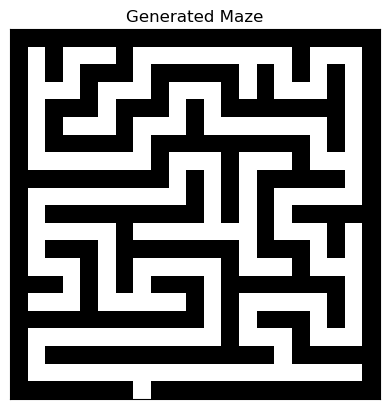

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 迷宫生成的方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成迷宫并确保有一个出口"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze):
    """绘制迷宫"""
    plt.imshow(maze, cmap='binary')
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.title("Generated Maze")
    plt.show()

# 生成并绘制迷宫
maze_size = (21, 21)  # 确保是奇数
maze, start, exit = generate_maze(maze_size)
plot_maze(maze)


C:\Users\14398\AppData\Local\Temp\ipykernel_33176\3201665746.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros_like(maze, dtype=np.bool)


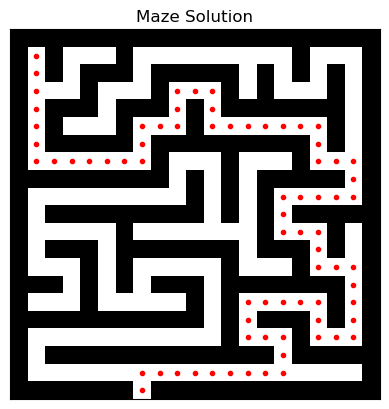

In [8]:
def solve_maze(maze, start, exit):
    """解决迷宫并返回路径"""
    height, width = maze.shape
    path = []
    visited = np.zeros_like(maze, dtype=np.bool)

    def dfs(x, y):
        if (x, y) == exit:  # 到达出口
            path.append((x, y))
            return True
        if x < 0 or x >= height or y < 0 or y >= width or visited[x, y] or maze[x, y] == 1:
            return False
        
        visited[x, y] = True
        path.append((x, y))

        for dx, dy in DIRECTIONS:
            if dfs(x + dx, y + dy):
                return True

        path.pop()  # 回溯
        return False

    dfs(start[0], start[1])  # 从起点开始
    return path

def plot_solution(maze, path):
    """绘制解决方案"""
    plt.imshow(maze, cmap='binary')
    for (x, y) in path:
        plt.plot(y, x, 'r.')  # 红点表示路径
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.title("Maze Solution")
    plt.show()

# 解决迷宫并绘制路径
solution_path = solve_maze(maze, start, exit)
plot_solution(maze, solution_path)


In [12]:
import numpy as np
import turtle
import random

# 迷宫生成的方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成迷宫并确保有一个出口"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def draw_maze(maze):
    """使用海龟绘制迷宫"""
    turtle.speed(0)
    turtle.penup()
    turtle.goto(-len(maze[0]) * 10 // 2, len(maze) * 10 // 2)  # 将海龟移动到左上角
    turtle.pendown()
    turtle.hideturtle()

    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i, j] == 1:
                turtle.fillcolor("black")
                turtle.begin_fill()
                for _ in range(4):
                    turtle.forward(10)  # 缩小绘制的单元格大小
                    turtle.right(90)
                turtle.end_fill()
            turtle.forward(10)  # 移动到下一个单元格
        turtle.penup()
        turtle.goto(-len(maze[0]) * 10 // 2, len(maze) * 10 // 2 - (i + 1) * 10)  # 回到行首
        turtle.pendown()

def explore_maze(maze, position, exit_position, path):
    """使用海龟探索迷宫"""
    x, y = position
    exit_x, exit_y = exit_position

    # 到达出口
    if position == exit_position:
        path.append(position)
        return True

    # 检查边界和障碍物
    if (x < 0 or x >= len(maze) or 
        y < 0 or y >= len(maze[0]) or 
        maze[x, y] == 1 or 
        position in path):
        return False

    path.append(position)

    # 尝试四个方向
    for dx, dy in DIRECTIONS:
        next_position = (x + dx, y + dy)
        if explore_maze(maze, next_position, exit_position, path):
            return True

    path.pop()  # 回溯
    return False

def draw_path(path):
    """使用海龟绘制路径"""
    turtle.penup()
    turtle.goto(-len(maze[0]) * 10 // 2 + 5, len(maze) * 10 // 2 - 5)  # 起始位置调整
    turtle.pendown()
    turtle.pencolor("red")
    turtle.pensize(2)

    for (x, y) in path:
        turtle.goto(-len(maze[0]) * 10 // 2 + y * 10 + 5, len(maze) * 10 // 2 - x * 10 - 5)

# 生成迷宫并绘制
maze_size = (21, 21)  # 确保是奇数
maze, start, exit = generate_maze(maze_size)

# 绘制迷宫
draw_maze(maze)

# 使用海龟探索迷宫
path = []
if explore_maze(maze, start, exit, path):
    draw_path(path)
else:
    print("无法找到路径！")

# 完成绘制
turtle.done()


C:\Users\14398\AppData\Local\Temp\ipykernel_33176\1882799902.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


C:\Users\14398\AppData\Local\Temp\ipykernel_33176\1843918759.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


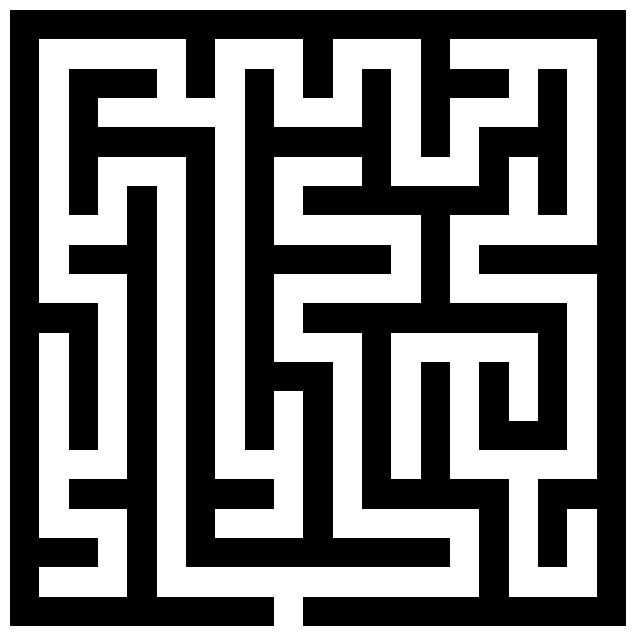

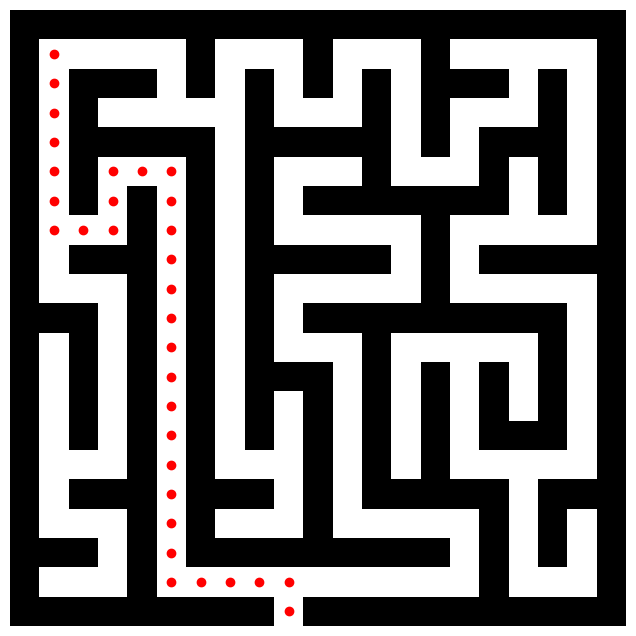

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 迷宫生成的方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成迷宫并确保有一个出口"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze, path=None):
    """使用matplotlib绘制迷宫"""
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='binary')  # 绘制迷宫

    if path is not None:
        # 绘制路径
        for (x, y) in path:
            plt.plot(y, x, 'ro')  # 用红点标记路径

    plt.axis('off')  # 关闭坐标轴
    plt.show()

def explore_maze(maze, position, exit_position, path):
    """递归探索迷宫"""
    x, y = position
    exit_x, exit_y = exit_position

    # 到达出口
    if position == exit_position:
        path.append(position)
        return True

    # 检查边界和障碍物
    if (x < 0 or x >= len(maze) or 
        y < 0 or y >= len(maze[0]) or 
        maze[x, y] == 1 or 
        position in path):
        return False

    path.append(position)

    # 尝试四个方向
    for dx, dy in DIRECTIONS:
        next_position = (x + dx, y + dy)
        if explore_maze(maze, next_position, exit_position, path):
            return True

    path.pop()  # 回溯
    return False

# 生成迷宫并绘制
maze_size = (21, 21)  # 确保是奇数
maze, start, exit = generate_maze(maze_size)

# 使用matplotlib绘制迷宫
plot_maze(maze)

# 使用递归探索迷宫
path = []
if explore_maze(maze, start, exit, path):
    plot_maze(maze, path)  # 绘制路径
else:
    print("无法找到路径！")


In [ ]:
import numpy as np
import cv2
import random

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze, path=None):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    if path is not None:
        # 绘制路径
        for (x, y) in path:
            cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 255), -1)  # 红色表示路径

    return maze_img

def is_within_bounds(position, maze):
    """检查位置是否在迷宫内"""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]

def explore_maze(maze, position, exit_position, path):
    """递归探索迷宫并显示过程"""
    x, y = position
    exit_x, exit_y = exit_position

    # 到达出口
    if position == exit_position:
        path.append(position)
        final_frame = plot_maze(maze, path)  # 绘制路径
        cv2.imshow("Maze Exploration", final_frame)  # 显示最后的帧
        cv2.waitKey(0)
        return True

    # 检查边界和障碍物
    if not is_within_bounds(position, maze) or maze[x, y] == 1 or position in path:
        return False

    path.append(position)
    current_frame = plot_maze(maze, path)  # 每步绘制当前状态
    cv2.imshow("Maze Exploration", current_frame)  # 显示当前帧
    key = cv2.waitKey(200)  # 等待200毫秒以显示动画效果

    # 检查是否按下了 'q' 键
    if key == ord('q'):
        cv2.destroyAllWindows()
        exit()

    # 尝试四个方向
    for dx, dy in DIRECTIONS:
        next_position = (x + dx, y + dy)
        if explore_maze(maze, next_position, exit_position, path):
            return True

    path.pop()  # 回溯
    return False

# 生成简单的迷宫，720P分辨率
maze_size = (35, 65)  # 更小的迷宫
maze, start, exit = generate_maze(maze_size)

# 使用递归探索迷宫并动态显示过程
path = []
explore_maze(maze, start, exit, path)

# 关闭所有OpenCV窗口
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
import random

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze, path=None):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    if path is not None:
        # 绘制路径
        for (x, y) in path:
            cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 255), -1)  # 红色表示路径

    return maze_img

def is_within_bounds(position, maze):
    """检查位置是否在迷宫内"""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]

def explore_maze(maze, position, exit_position, path, delay):
    """递归探索迷宫并显示过程"""
    x, y = position
    exit_x, exit_y = exit_position

    # 到达出口
    if position == exit_position:
        path.append(position)
        final_frame = plot_maze(maze, path)  # 绘制路径
        cv2.imshow("Maze Exploration", final_frame)  # 显示最后的帧
        cv2.waitKey(0)
        return True

    # 检查边界和障碍物
    if not is_within_bounds(position, maze) or maze[x, y] == 1 or position in path:
        return False

    path.append(position)
    current_frame = plot_maze(maze, path)  # 每步绘制当前状态
    cv2.imshow("Maze Exploration", current_frame)  # 显示当前帧
    key = cv2.waitKey(delay)  # 使用延迟来控制速度

    # 检查是否按下了 'q' 键
    if key == ord('q'):
        cv2.destroyAllWindows()
        exit()

    # 尝试四个方向
    for dx, dy in DIRECTIONS:
        next_position = (x + dx, y + dy)
        if explore_maze(maze, next_position, exit_position, path, delay):
            return True

    path.pop()  # 回溯
    return False

# 设置滑块来控制速度
def nothing(x):
    pass

# 生成简单的迷宫，720P分辨率
maze_size = (35, 65)  # 更小的迷宫
maze, start, exit = generate_maze(maze_size)

# 创建窗口并添加滑块
cv2.namedWindow("Maze Exploration")
cv2.createTrackbar("Speed", "Maze Exploration", 200, 1000, nothing)  # 200毫秒到1000毫秒的滑块

# 使用递归探索迷宫并动态显示过程
path = []
while True:
    speed = cv2.getTrackbarPos("Speed", "Maze Exploration")
    speed = max(1, speed)  # 确保速度至少为1毫秒
    explore_maze(maze, start, exit, path, speed)

    # 重新开始探索
    path.clear()
    explore_maze(maze, start, exit, path, speed)
    cv2.waitKey(0)

# 关闭所有OpenCV窗口
cv2.destroyAllWindows()


### BFS走迷宫

In [1]:
import numpy as np
import cv2
import random
from collections import deque

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze, path=None):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    if path is not None:
        # 绘制路径
        for (x, y) in path:
            cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 255), -1)  # 红色表示路径

    return maze_img

def bfs_maze(maze, start, exit_position):
    """使用BFS探索迷宫"""
    queue = deque([start])  # 队列初始化
    path = []  # 存储路径
    visited = set()  # 访问过的节点
    parent = {start: None}  # 记录父节点

    while queue:
        position = queue.popleft()
        x, y = position

        # 到达出口
        if position == exit_position:
            # 回溯路径
            while position is not None:
                path.append(position)
                position = parent[position]
            path.reverse()  # 反转路径
            return path

        # 检查邻居
        for dx, dy in DIRECTIONS:
            next_position = (x + dx, y + dy)

            if (is_within_bounds(next_position, maze) and
                maze[next_position] == 0 and
                next_position not in visited):
                
                visited.add(next_position)
                queue.append(next_position)
                parent[next_position] = position  # 记录父节点

    return []  # 如果没有路径，则返回空列表

def is_within_bounds(position, maze):
    """检查位置是否在迷宫内"""
    x, y = position
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]

# 生成简单的迷宫，720P分辨率
maze_size = (35, 65)  # 更小的迷宫
maze, start, exit = generate_maze(maze_size)

# 创建窗口
cv2.namedWindow("Maze Exploration", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Maze Exploration", 1280, 720)  # 设置窗口为720P

# 使用BFS探索迷宫并显示过程
path = bfs_maze(maze, start, exit)

# 绘制路径
for position in path:
    maze_img = plot_maze(maze, path)
    cv2.imshow("Maze Exploration", maze_img)
    cv2.waitKey(200)  # 每个步骤的延迟

# 显示最后的图像并等待用户按键
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\14398\AppData\Local\Temp\ipykernel_26572\2139665728.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


: 

### 迷宫不实时生成，先造一张图表示迷宫

In [12]:
import numpy as np
import cv2
import random

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    return maze_img

def draw_path(maze_img, path):
    """绘制路径"""
    for (x, y) in path:
        # 使用红色方块填充路径
        cv2.rectangle(maze_img, (y * 20, x * 20), ((y + 1) * 20, (x + 1) * 20), (0, 0, 255), -1)

def explore_maze(maze, start, exit, path, visited, maze_img, delay):
    """递归探索迷宫"""
    x, y = start
    path.append((x, y))  # 更新路径
    visited[x, y] = True  # 标记为已访问

    # 动态绘制当前路径
    draw_path(maze_img, path)
    cv2.imshow("Maze", maze_img)
    cv2.waitKey(delay)  # 等待一段时间以控制速度

    # 检查是否到达出口
    if start == exit:
        print("Reached the exit!")
        return True

    for dx, dy in DIRECTIONS:
        nx, ny = x + dx, y + dy
        if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0 and not visited[nx, ny]:
            if explore_maze(maze, (nx, ny), exit, path, visited, maze_img, delay):
                return True

    # 如果走入死胡同，回退并更新路径
    path.pop()
    return False  # 如果没有找到出口，则返回False

# 生成迷宫
maze_size = (21, 41)  # 迷宫大小
maze, start, exit = generate_maze(maze_size)

# 绘制迷宫
maze_img = plot_maze(maze)

# 创建一个窗口并添加滑块
cv2.namedWindow("Maze")
cv2.createTrackbar("Speed", "Maze", 1, 100, lambda x: None)  # 滑块控制速度

# 初始化路径和访问记录
path = []
visited = np.zeros_like(maze, dtype=bool)

# 探索迷宫
explore_maze(maze, start, exit, path, visited, maze_img, 100)

# 显示最终的迷宫图像
cv2.imshow("Maze", maze_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\14398\AppData\Local\Temp\ipykernel_2464\4124318546.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


Reached the exit!


### BFS

In [1]:
import numpy as np
import cv2
import random
from collections import deque

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    return maze_img

def bfs_maze(maze, start, exit, maze_img):
    """广度优先搜索探索迷宫"""
    queue = deque([start])
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    parent = {start: None}  # 记录路径

    while queue:
        x, y = queue.popleft()
        
        # 动态绘制当前路径
        cv2.rectangle(maze_img, (y * 20, x * 20), ((y + 1) * 20, (x + 1) * 20), (0, 0, 255), -1)
        cv2.imshow("Maze", maze_img)
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break  # 按下 q 键退出

        # 检查是否到达出口
        if (x, y) == exit:
            break

        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0 and not visited[nx, ny]:
                visited[nx, ny] = True
                queue.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    return parent

def reconstruct_path(parent, exit):
    """根据父节点重建路径"""
    path = []
    step = exit
    while step is not None:
        path.append(step)
        step = parent[step]
    return path[::-1]  # 反转路径

# 生成迷宫
maze_size = (21, 41)  # 迷宫大小
maze, start, exit = generate_maze(maze_size)

# 绘制迷宫
maze_img = plot_maze(maze)

# BFS探索迷宫
parent = bfs_maze(maze, start, exit, maze_img)

# 重建路径
path = reconstruct_path(parent, exit)

# 绘制最终的路径
for (x, y) in path:
    cv2.rectangle(maze_img, (y * 20, x * 20), ((y + 1) * 20, (x + 1) * 20), (0, 255, 0), -1)

# 显示最终的迷宫图像
cv2.imshow("Maze", maze_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\14398\AppData\Local\Temp\ipykernel_14140\2049472042.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


### DFS

In [2]:
import numpy as np
import cv2
import random

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = random.randrange(1, height, 2), random.randrange(1, width, 2)
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            nx, ny = random.choice(neighbors)
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x, exit_y = height - 1, random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (1, 1), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    return maze_img

def dfs_maze(maze, position, exit, maze_img, visited):
    """深度优先搜索探索迷宫"""
    x, y = position
    visited[x, y] = True

    # 动态绘制当前路径
    cv2.rectangle(maze_img, (y * 20, x * 20), ((y + 1) * 20, (x + 1) * 20), (0, 0, 255), -1)
    cv2.imshow("Maze", maze_img)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        return False  # 按下 q 键退出

    # 检查是否到达出口
    if position == exit:
        return True

    # 探索四个方向
    for dx, dy in DIRECTIONS:
        nx, ny = x + dx, y + dy
        if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0 and not visited[nx, ny]:
            if dfs_maze(maze, (nx, ny), exit, maze_img, visited):
                return True

    return False

# 生成迷宫
maze_size = (21, 41)  # 迷宫大小
maze, start, exit = generate_maze(maze_size)

# 绘制迷宫
maze_img = plot_maze(maze)

# 深度优先搜索探索迷宫
visited = np.zeros_like(maze, dtype=bool)
dfs_maze(maze, start, exit, maze_img, visited)

# 显示最终的迷宫图像
cv2.rectangle(maze_img, (exit[1] * 20, exit[0] * 20), ((exit[1] + 1) * 20, (exit[0] + 1) * 20), (0, 255, 0), -1)
cv2.imshow("Maze", maze_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\14398\AppData\Local\Temp\ipykernel_14140\2594080968.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


**BFS 通常比 DFS 更适合用于寻找最短路径，因此在迷宫问题中更有效。**

### A*算法走迷宫

In [10]:
import numpy as np
import cv2
import heapq

# 定义四个方向
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def generate_maze(size):
    """生成简单迷宫"""
    height, width = size
    maze = np.ones((height, width), dtype=np.int8)  # 1表示墙壁
    visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问
    stack = []

    # 从随机起始位置开始
    start_x, start_y = 1, 1  # 确保起始位置在路径上
    maze[start_x, start_y] = 0  # 0表示路径
    visited[start_x, start_y] = True
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        neighbors = []

        # 检查邻居
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx * 2, y + dy * 2
            if 0 < nx < height and 0 < ny < width and not visited[nx, ny]:
                neighbors.append((nx, ny))

        if neighbors:
            # 确保选择邻居前有有效邻居
            nx, ny = neighbors[np.random.choice(len(neighbors))]  # 使用索引选择
            maze[x + (nx - x) // 2, y + (ny - y) // 2] = 0  # 打通墙壁
            maze[nx, ny] = 0
            visited[nx, ny] = True
            stack.append((nx, ny))
        else:
            stack.pop()

    # 确保有出口
    exit_x = height - 2  # 确保出口在路径上
    exit_y = np.random.choice(range(1, width - 1, 2))
    maze[exit_x, exit_y] = 0  # 打开出口

    return maze, (start_x, start_y), (exit_x, exit_y)  # 返回迷宫，起点和出口

def plot_maze(maze):
    """使用OpenCV绘制迷宫"""
    scale = 20  # 增加墙体的厚度
    height, width = maze.shape
    maze_img = np.ones((height * scale, width * scale, 3), dtype=np.uint8) * 255  # 白色背景

    # 设置墙壁和路径
    for x in range(height):
        for y in range(width):
            if maze[x, y] == 1:  # 墙壁
                cv2.rectangle(maze_img, (y * scale, x * scale), ((y + 1) * scale, (x + 1) * scale), (0, 0, 0), -1)

    return maze_img

def heuristic(a, b):
    """计算曼哈顿距离"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar_maze(maze, start, exit):
    """A*算法探索迷宫"""
    open_set = []
    heapq.heappush(open_set, (0, start))  # (f_score, current)
    came_from = {}
    
    g_score = {start: 0}  # 从起点到当前节点的成本
    f_score = {start: heuristic(start, exit)}  # 从起点到终点的预估成本

    while open_set:
        current = heapq.heappop(open_set)[1]
        x, y = current

        # 检查是否到达出口
        if current == exit:
            break

        # 探索四个方向
        for dx, dy in DIRECTIONS:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < maze.shape[0] and 0 <= neighbor[1] < maze.shape[1]:
                if maze[neighbor] == 0:  # 如果是路径
                    tentative_g_score = g_score[current] + 1
                    if tentative_g_score < g_score.get(neighbor, float('inf')):
                        came_from[neighbor] = current
                        g_score[neighbor] = tentative_g_score
                        f_score[neighbor] = tentative_g_score + heuristic(neighbor, exit)
                        if neighbor not in [i[1] for i in open_set]:
                            heapq.heappush(open_set, (f_score[neighbor], neighbor))

    # 返回路径
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.reverse()  # 反转路径
    return path

# 生成迷宫
maze_size = (21, 41)  # 迷宫大小
maze, start, exit = generate_maze(maze_size)

# 绘制迷宫
maze_img = plot_maze(maze)

# 使用A*算法探索迷宫
path = astar_maze(maze, start, exit)

# 动态绘制路径
for (x, y) in path:
    cv2.rectangle(maze_img, (y * 20, x * 20), ((y + 1) * 20, (x + 1) * 20), (0, 255, 0), -1)
    cv2.imshow("Maze", maze_img)
    cv2.waitKey(100)  # 等待100ms

# 绘制出口
cv2.rectangle(maze_img, (exit[1] * 20, exit[0] * 20), ((exit[1] + 1) * 20, (exit[0] + 1) * 20), (0, 255, 0), -1)

# 显示最终的迷宫图像
cv2.imshow("Maze", maze_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#############
###还没完成###
#############


C:\Users\14398\AppData\Local\Temp\ipykernel_14140\1732288148.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((height, width), dtype=np.bool)  # 0表示未访问


### hhhh